In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [256]:
metadata = pd.read_csv("Data Dictionary.csv")

In [257]:
df = pd.read_csv("Dataset.csv")
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [259]:
df['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [260]:
df.dtypes[df.dtypes == object]

ethnicity                object
gender                   object
hospital_admit_source    object
icu_admit_source         object
icu_stay_type            object
icu_type                 object
apache_3j_bodysystem     object
apache_2_bodysystem      object
dtype: object

In [261]:
df.dtypes[df.dtypes == int]

encounter_id             int64
patient_id               int64
hospital_id              int64
hospital_death           int64
elective_surgery         int64
icu_id                   int64
readmission_status       int64
apache_post_operative    int64
dtype: object

In [262]:
df['readmission_status'].value_counts()

0    91713
Name: readmission_status, dtype: int64

In [263]:
df.drop(['encounter_id', 'patient_id', 'hospital_id', 'icu_id'], axis=1, inplace=True)
df.drop(['readmission_status', 'elective_surgery'], axis=1, inplace=True)

In [264]:
df['ethnicity'].value_counts()

Caucasian           70684
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

In [265]:
df = pd.concat([df.drop('ethnicity', axis=1), pd.get_dummies(df['ethnicity'], drop_first=True)], axis=1)
df = pd.concat([df.drop('gender', axis=1), pd.get_dummies(df['gender'], drop_first=True)], axis=1)
df = pd.concat([df.drop('hospital_admit_source', axis=1), pd.get_dummies(df['hospital_admit_source'], drop_first=True)], axis=1)

In [266]:
df.dtypes[df.dtypes == object]

icu_admit_source        object
icu_stay_type           object
icu_type                object
apache_3j_bodysystem    object
apache_2_bodysystem     object
dtype: object

In [267]:
df = df.select_dtypes(exclude=['object'])

In [268]:
df.describe()

,hospital_death,age,bmi,height,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,ICU,ICU to SDU,Observation,Operating Room,Other,Other Hospital,Other ICU,PACU,Recovery Room,Step-Down Unit (SDU)
count,91713.000000,87485.000000,88284.000000,90379.000000,91713.000000,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,...,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,62.309516,29.185818,169.641588,0.835766,84.028340,2.902968,185.401739,558.216377,0.201106,...,0.000382,0.000491,0.000109,0.106713,0.000076,0.017893,0.002541,0.011089,0.031577,0.012332
std,0.280811,16.775119,8.275142,10.795378,2.487756,25.011497,0.681863,86.050882,463.266985,0.400829,...,0.019532,0.022146,0.010442,0.308750,0.008736,0.132562,0.050340,0.104719,0.174871,0.110363
min,0.000000,16.000000,14.844926,137.200000,-24.947222,38.600000,1.200000,101.000000,0.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,23.641975,162.500000,0.035417,66.800000,2.400000,113.000000,203.010000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,65.000000,27.654655,170.100000,0.138889,80.300000,2.900000,122.000000,409.020000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,75.000000,32.930206,177.800000,0.409028,97.100000,3.400000,301.000000,703.030000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,89.000000,67.814990,195.590000,159.090972,186.000000,4.600000,308.000000,2201.050000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
df.isnull().sum()

hospital_death             0
age                     4228
bmi                     3429
height                  1334
pre_icu_los_days           0
                        ... 
Other Hospital             0
Other ICU                  0
PACU                       0
Recovery Room              0
Step-Down Unit (SDU)       0
Length: 192, dtype: int64

In [270]:
age_mean = df['age'].mean()

<Figure size 1080x1080 with 0 Axes>

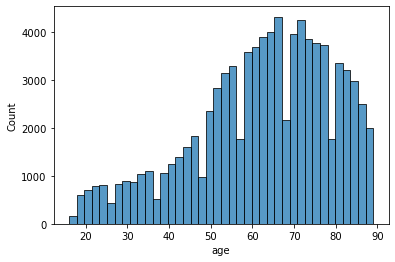

<Figure size 1080x1080 with 0 Axes>

In [271]:
sns.histplot(df['age'], bins=40)
plt.figure(figsize=(15,15))

In [272]:
label_names = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100']
cut_points = [0, 20, 30, 40, 50, 60, 70, 80, 100]
df['age_group'] = pd.cut(df['age'], cut_points, labels=label_names)

In [273]:
df = pd.concat([df.drop('age', axis=1), pd.get_dummies(df['age_group'], drop_first=True)], axis=1)
df.drop(['age_group'], inplace=True, axis=1)

<AxesSubplot:xlabel='apache_4a_hospital_death_prob', ylabel='Count'>

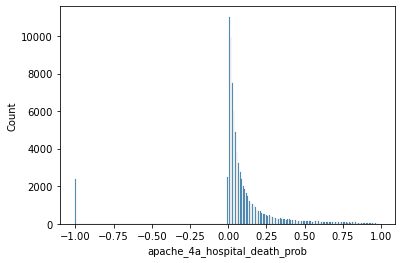

In [274]:
sns.histplot(df['apache_4a_hospital_death_prob'])

In [275]:
df.drop(df[df['apache_4a_hospital_death_prob'] < 0 ].index, inplace=True)

In [276]:
df['apache_4a_hospital_death_prob'].value_counts()

0.01    11023
0.02     9970
0.03     7504
0.04     5996
0.05     4869
        ...  
0.95       22
0.96       21
0.97       11
0.98        5
0.99        1
Name: apache_4a_hospital_death_prob, Length: 100, dtype: int64

/Users/thilakcm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d1_heartrate_min'>

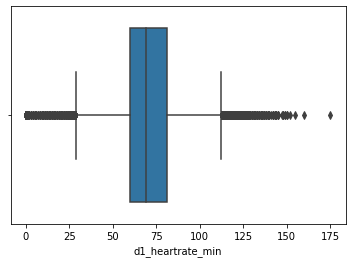

In [277]:
sns.boxplot(df['d1_heartrate_min'])

In [278]:
df.drop(df[df['d1_heartrate_min'] < 25 ].index, inplace=True)
df.drop(df[df['d1_heartrate_min'] > 125 ].index, inplace=True)

/Users/thilakcm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d1_heartrate_max'>

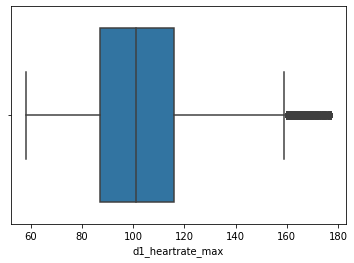

In [279]:
sns.boxplot(df['d1_heartrate_max'])

In [280]:
df.drop(df[df['d1_heartrate_max'] > 160 ].index, inplace=True)

In [281]:
df.duplicated().sum()

0

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87142 entries, 0 to 91712
Columns: 198 entries, hospital_death to 80-100
dtypes: float64(169), int64(2), uint8(27)
memory usage: 116.6 MB


In [283]:
df.shape[0]

87142

# Model Selection and Training

In [284]:
from xgboost import XGBClassifier, plot_importance
xgb_model = XGBClassifier()

In [285]:
X  = df.drop(['hospital_death'], axis=1)
y = df['hospital_death']

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['hospital_death'])

In [287]:
xgb_model.fit(X_train, y_train)

/Users/thilakcm/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
predictions = xgb_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, classification_report, confusion_matrix

MAE = mean_absolute_error(y_test, predictions)
print(f"mean_absolute_error of model:{MAE}")

mean_absolute_error of model:0.06846957120452894


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     24070
           1       0.64      0.31      0.42      2073

    accuracy                           0.93     26143
   macro avg       0.79      0.65      0.69     26143
weighted avg       0.92      0.93      0.92     26143



In [ ]:
print(confusion_matrix(y_test, predictions))

[[23704   366]
 [ 1424   649]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

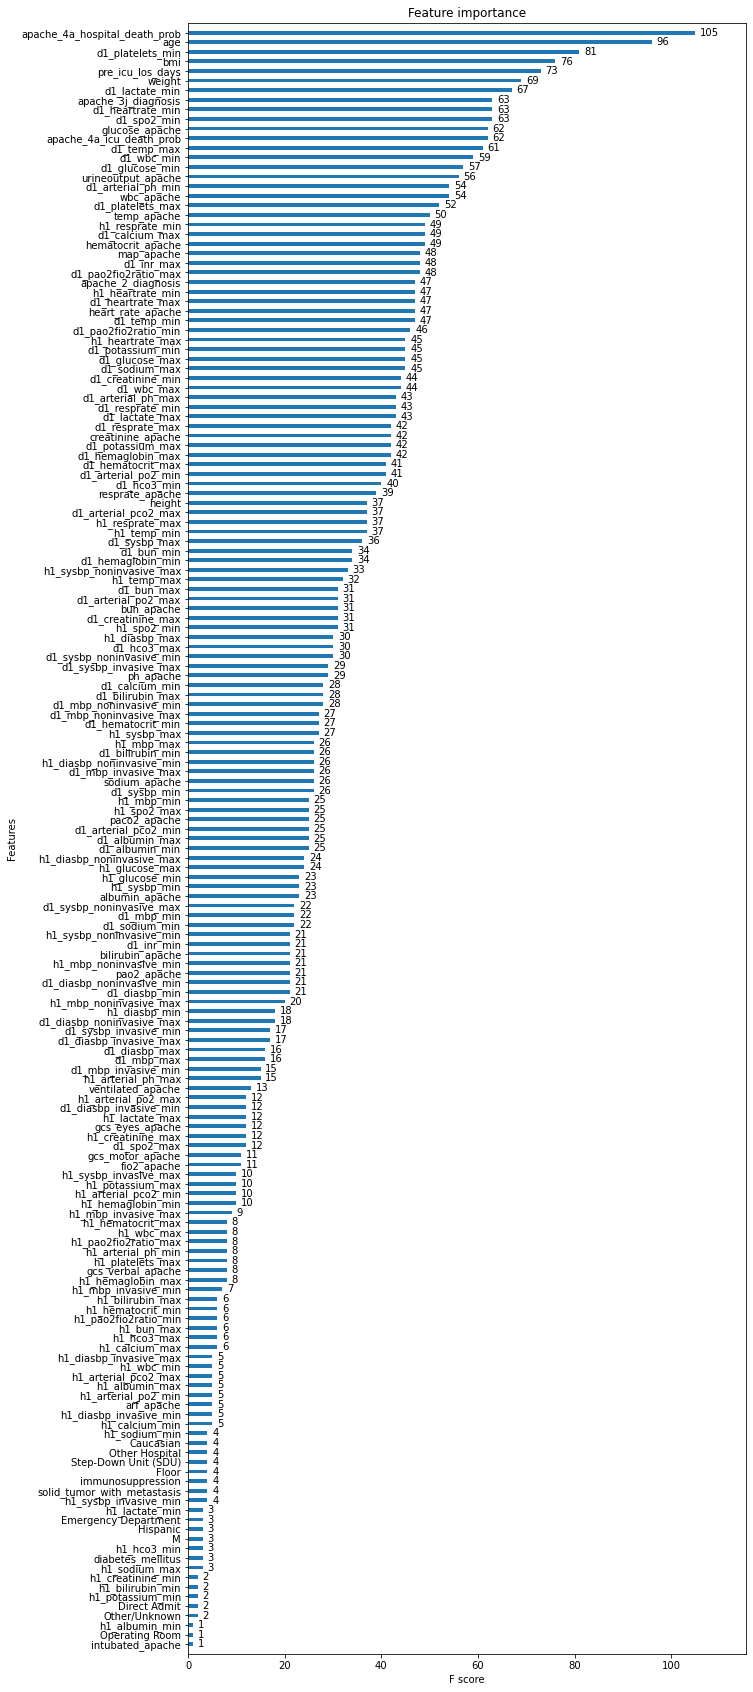

In [ ]:
fig, ax = plt.subplots(figsize=(10, 30))
plot_importance(xgb_model, grid=False, height=0.4, ax=ax)